## Se define el modelo:   

In [1]:
def line(x, a, b):
    return a*(x)+b

## Se cargan librerías: 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.special import ndtri
import numpy as np

# import Nestle

#import nestle
import dynesty
%matplotlib

Using matplotlib backend: Qt5Agg


Se generan puntos dentro del intervalo $[0,10)$

In [3]:
#x = np.linspace(0, 10 , 100)  
x = np.arange(0,10,0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

Se genera ruido gaussiano:

In [4]:
#noise = np.random.normal(0.01, .01, size=40)
sigma = 0.5
noise1 = sigma*np.random.rand(len(x))
noise2 = sigma*np.random.rand(len(x))
x1 = x + noise1
x2 = x + noise2
noise = np.concatenate((noise1, noise2))

In [5]:
x1

array([ 0.01243141,  0.16881338,  0.3481015 ,  0.43278687,  0.79623126,
        0.89840999,  1.00745891,  0.96546127,  1.14196145,  0.92719714,
        1.22711434,  1.40097013,  1.52054743,  1.3138176 ,  1.79001266,
        1.9113614 ,  2.07371686,  2.1630887 ,  2.20630763,  2.01506943,
        2.34170888,  2.18376053,  2.53954175,  2.35279451,  2.87071234,
        2.74354111,  2.96702622,  2.75251378,  2.86114354,  2.90929894,
        3.42566591,  3.2847254 ,  3.60641598,  3.6366039 ,  3.80087187,
        3.80546323,  4.07719723,  4.08963883,  4.14356909,  4.34454345,
        4.28166338,  4.28262407,  4.30363748,  4.52166046,  4.58540342,
        4.9385285 ,  5.04912634,  5.12928592,  5.25573823,  4.98799838,
        5.12213132,  5.13951886,  5.66872658,  5.35134254,  5.51740387,
        5.91066222,  5.94190749,  5.94997454,  6.19745467,  6.2737685 ,
        6.27970853,  6.49320886,  6.66369472,  6.49945341,  6.43615591,
        6.65940016,  6.80329831,  6.92371102,  6.97267116,  7.11

In [6]:
x2

array([ 0.20990628,  0.22070382,  0.2487499 ,  0.33678087,  0.58376709,
        0.57862583,  0.97371594,  0.78349509,  0.97882326,  1.17666351,
        1.44334299,  1.28419165,  1.52593718,  1.40748257,  1.79542876,
        1.90749229,  1.77699952,  1.79946729,  1.80338459,  2.1324543 ,
        2.20767558,  2.19705462,  2.36286328,  2.78359159,  2.59606215,
        2.58976592,  3.06068639,  2.99341318,  3.10701786,  3.25942122,
        3.33789935,  3.57489736,  3.48813465,  3.7945074 ,  3.67932614,
        3.70349444,  3.92290249,  3.84966235,  3.88650226,  4.15150139,
        4.3816811 ,  4.45724335,  4.36202198,  4.43401356,  4.43226836,
        4.86260805,  5.00514649,  5.10692923,  4.93489116,  5.26396305,
        5.45262968,  5.49297841,  5.67071427,  5.35709916,  5.82558061,
        5.90131653,  6.08413703,  5.99747957,  6.11995374,  6.39819577,
        6.32717987,  6.33602056,  6.59126706,  6.58540457,  6.85836636,
        6.89782518,  7.09677624,  6.75713777,  7.26896899,  6.90

A la variable $y$ se le asigna la función line más el ruido gaussiano. 

In [7]:
a = 3
b = 5
y1 = line(x1, 4, 4)+noise1
y2 = line(x2, 3, 5)+noise2

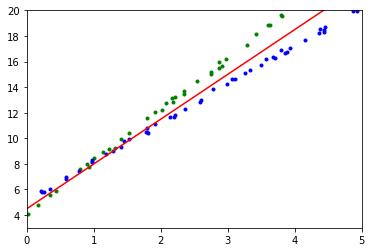

In [8]:
plt.scatter(x1,y1, color='green', marker='.') 
plt.scatter(x2,y2, color='blue', marker='.') 

plt.plot(x, [line(i,3.5,4.5) for i in x], color = 'red')
plt.xlim(0,5)
plt.ylim(3,20)
plt.savefig("lines.png")


In [10]:
x =  np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

Se juntan en un solo numpy array los valores de x,y.

In [11]:
text = np.empty(len(x)*2)
text = np.reshape(text,(len(x),2))
for i in range(len(x)):
    text[i,:]= x[i],y[i]
np.shape(text)
text

array([[1.24314084e-02, 4.06215704e+00],
       [1.68813380e-01, 4.74406690e+00],
       [3.48101500e-01, 5.54050750e+00],
       [4.32786871e-01, 5.86393436e+00],
       [7.96231255e-01, 7.58115628e+00],
       [8.98409988e-01, 7.99204994e+00],
       [1.00745891e+00, 8.43729455e+00],
       [9.65461269e-01, 8.12730635e+00],
       [1.14196145e+00, 8.90980724e+00],
       [9.27197142e-01, 7.73598571e+00],
       [1.22711434e+00, 9.13557172e+00],
       [1.40097013e+00, 9.90485064e+00],
       [1.52054743e+00, 1.04027372e+01],
       [1.31381760e+00, 9.26908802e+00],
       [1.79001266e+00, 1.15500633e+01],
       [1.91136140e+00, 1.20568070e+01],
       [2.07371686e+00, 1.27685843e+01],
       [2.16308870e+00, 1.31154435e+01],
       [2.20630763e+00, 1.32315381e+01],
       [2.01506943e+00, 1.21753472e+01],
       [2.34170888e+00, 1.37085444e+01],
       [2.18376053e+00, 1.28188027e+01],
       [2.53954175e+00, 1.44977088e+01],
       [2.35279451e+00, 1.34639725e+01],
       [2.870712

Se guardan archivos de texto tanto para los datos generados (x,y), como los errores:

In [12]:
np.savetxt('linemixdata.txt',text)
np.savetxt('noiselinemixdata.txt',noise)

Creando un txt con la matriz de covarianza creada a partir del ruido en txt.

In [13]:
errors = np.loadtxt('noiselinemixdata.txt')
errorsdiag = np.diag(errors**2)
cov = errorsdiag
np.savetxt("cov_linemix.txt",errorsdiag)
np.shape(errors)

(200,)

Se cargan los datos (x,y) y la matriz de covarianza:

In [14]:
data=np.loadtxt('linemixdata.txt')
x=data[:,0]
y=data[:,1]
cov=np.loadtxt('cov_linemix.txt',skiprows=0)

Ajustando recta

In [15]:
LN2PI = np.log(2.*np.pi)
#LNSIGMA = np.log(sigma)
M=len(x)


Escribiendo Priors planos:

In [16]:
def prior_transform(theta):
    
    mprime, cprime = theta # unpack the parameters (in their unit hypercube form)

    cmin = -10.  # lower bound on uniform prior on c
    cmax = 10.   # upper bound on uniform prior on c

    mmin = -10.  # lower bound on uniform prior on c
    mmax = 10.   # upper bound on uniform prior on c

    m = mprime*(mmax-mmin) + mmin 
    c = cprime*(cmax-cmin) + cmin  # convert back to c

    return (m, c)



Definiendo un likelihood similar a SuperMC:

In [17]:
import scipy.linalg as la
from scipy import dot
icov = la.inv(cov)
#icov = errorsdiag
def loglikelihood_nestle(theta):

    m, c = theta # unpack the parameters

    # normalisation
    #norm = -0.5*M*LN2PI - M*LNSIGMA
    #norm = -np.log(la.det(errorsdiag))*0.5-0.5*len(x)*np.log(np.pi)

    norm = -np.log(la.det(cov))*0.5-0.5*len(x)*np.log(np.pi)
    #chisq = np.sum(((y-line(x, m, c))/sigma)**2)
    delta = y - line(x,m,c)
    chisq = dot(delta,dot(icov,delta))

    #return norm - 0.5*chisq
    return  norm -0.5*chisq



Corriendo multinest:

In [50]:
#nlive = 1024     # number of live points
nlive = 1024
method = 'multi' # use MutliNest algorithm
ndims = 2        # two parameters
tol= 0.01         # the stopping criterion (this is the nestle default, so doesn't need to be set)

res = dynesty.NestedSampler(loglikelihood_nestle, prior_transform, ndims, 
                    bounds=method, npoints=nlive, dlogz=tol)



/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  app.launch_new_instance()


In [25]:
nlive = 40
method = 'multi' # use MutliNest algorithm
ndims = 2        # two parameters
tol= 0.01         # the stopping criterion (this is the nestle default, so doesn't need to be set)

#res = nestle.sample(loglikelihood_nestle, prior_transform, ndims, 
#                    method=method, npoints=nlive, dlogz=tol,  callback=nestle.print_progress)

res = dynesty.NestedSampler(loglikelihood_nestle, prior_transform, ndims,
                        method=method, sample = 'unif', nlive = nlive)

res.run_nested(dlogz=tol)
# res.summary()

/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  app.launch_new_instance()
140it [01:27,  2.12s/it, bound: 0 | nc: 75 | ncall: 1446 | eff(%):  9.682 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.622 | dlogz: 782468.475 >  0.010]/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  app.launch_new_instance()
164it [01:30,  4.41it/s, bound: 1 | nc: 5 | ncall: 1509 | eff(%): 10.868 | loglstar:   -inf < -751459.792 <    inf | logz: -751468.224 +/-  0.645 | dlogz: 426745.232 >  0.010]/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  app.launch_new_instance()
192it [01:35,  3.05it/s, bound: 2 | nc: 4 | nca

579it [02:58,  3.64it/s, bound: 21 | nc: 12 | ncall: 2794 | eff(%): 20.723 | loglstar:   -inf < -321875.357 <    inf | logz: -321892.271 +/-  0.879 | dlogz:  9.819 >  0.010]/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  app.launch_new_instance()
591it [03:03,  2.25it/s, bound: 22 | nc: 11 | ncall: 2859 | eff(%): 20.672 | loglstar:   -inf < -321873.728 <    inf | logz: -321889.808 +/-  0.873 | dlogz:  6.798 >  0.010]/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  app.launch_new_instance()
611it [03:08,  2.94it/s, bound: 23 | nc: 13 | ncall: 2926 | eff(%): 20.882 | loglstar:   -inf < -321871.788 <    inf | logz: -321888.213 +/-  0.865 | dlogz:  5.147 >  0.010]/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16:

In [43]:
result = res.results
logZdynesty = result.logz[-1]        # value of logZ
logZerrdynesty = result.logzerr[-1]  # estimate of the statistcal uncertainty on logZ

# output marginal likelihood
print('Marginalised evidence (using static sampler) is {} ± {}'.format(logZdynesty, logZerrdynesty))

# get the posterior samples
weights = np.exp(result['logwt'] - result['logz'][-1])
#postsamples2 = dynesty.utils.resample_equal(res2.samples, weights)
postsamples = result.samples


np.shape(postsamples)
postsamples[:,0]

Marginalised evidence (using static sampler) is -321884.3266448435 ± 0.8717437194848128


array([-9.90985098, -8.66322963, -6.40855872, -6.0385818 , -5.15444133,
       -6.55095085, -3.49556453, -6.02731435, -2.77756012, -2.95972776,
       -1.48121196,  9.70980366, -1.59278766, -2.81251746,  9.70670851,
       -2.94518577, -0.95560391, -1.57134674,  0.38464627,  9.3026724 ,
        9.78104576, -0.14049676,  9.2182287 ,  9.85154675,  9.52064258,
        1.95193183,  9.68014958,  7.29489131,  7.82812998, -0.34330118,
       -0.73063151,  7.22254627, -0.64798479, -0.53591916,  8.28295968,
        1.28601817,  1.42058638,  7.74204342,  0.89727581,  1.78245227,
        0.2384736 ,  5.89859847,  7.61162479,  8.46025248,  2.05983847,
        3.0307018 ,  6.97172632,  0.60566542,  6.61950909,  0.9677006 ,
        0.66987296,  3.63611713,  5.88446784,  3.6569382 ,  2.45609931,
        7.60075106,  1.27990595,  7.03002505,  2.30397227,  6.10792707,
        4.86730304,  3.60531961,  5.39850713,  5.2089472 ,  6.14635388,
        6.22291471,  1.84215443,  4.67475085,  6.73473522,  5.87

In [49]:
plt.scatter(postsamples[:,0], postsamples[:,1])
plt.xlim(3,6)
plt.ylim(3,6)
plt.show()

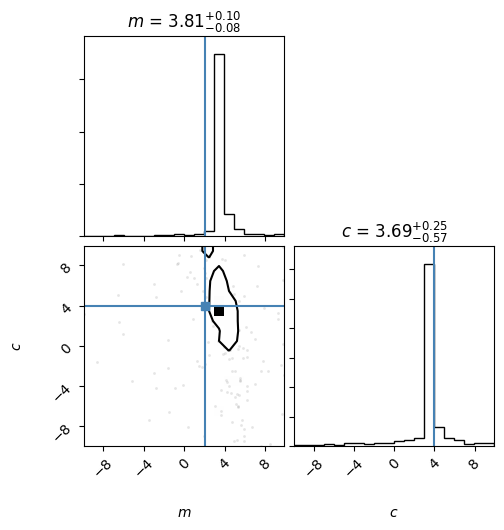

In [29]:

# plot posterior samples (if corner.py is installed)
try:
    import matplotlib as mpl
    mpl.use("Agg") # force Matplotlib backend to Agg
    import corner # import corner.py
except ImportError:
    sys.exit(1)

corner.corner(postsamples, labels=[r"$m$", r"$c$"], truths=[2, 4], show_titles=True)
#fig.savefig('Nestle.png')

## Probando EMCEE

In [21]:
import emcee

In [37]:
def logposterior(theta, data, sigma, x):
    """
    The natural logarithm of the joint posterior.
    
    Args:
        theta (tuple): a sample containing individual parameter values
        data (list): the set of data/observations
        sigma (float): the standard deviation of the data points
        x (list): the abscissa values at which the data/model is defined
    """
    
    lp = logprior(theta) # get the prior
    
    # if the prior is not finite return a probability of zero (log probability of -inf)
    if not np.isfinite(lp):
        return -np.inf
    
    # return the likeihood times the prior (log likelihood plus the log prior)
    #return lp + loglikelihood(theta, data, sigma, x)
    return lp + loglikelihood

In [44]:
def loglikelihood(theta, data, sigma, x):
    """
    The natural logarithm of the joint likelihood.
    
    Args:
        theta (tuple): a sample containing individual parameter values
        data (list): the set of data/observations
        sigma (float): the standard deviation of the data points
        x (list): the abscissa values at which the data/model is defined
    
    Note:
        We do not include the normalisation constants (as discussed above).
    """
    
    # unpack the model parameters from the tuple
    m, c = theta
    
    # evaluate the model (assumes that the straight_line model is defined as above)
    md = line(x, m, c)
    
    # return the log likelihood
    #return -0.5*np.sum(((md - data)/sigma)**2)
    return -0.5*np.sum(((md - y)/sigma)**2)

In [45]:
def logprior(theta):
    """
    The natural logarithm of the prior probability.
    
    Args:
        theta (tuple): a sample containing individual parameter values
    
    Note:
        We can ignore the normalisations of the prior here.
    """
    
    lp = 0.
    
    # unpack the model parameters from the tuple
    m, c = theta
    
    # uniform prior on c
    cmin = -10. # lower range of prior
    cmax = 10.  # upper range of prior
    
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range 
    lp = 0. if cmin < c < cmax else -np.inf
    
    # Gaussian prior on m
    mmu = 0.     # mean of the Gaussian prior
    msigma = 10. # standard deviation of the Gaussian prior
    lp -= 0.5*((m - mmu)/msigma)**2
    
    return lp

In [48]:
Nens = 100   # Nens number of ensemble points

mmu = 0.     # mean of the Gaussian prior
msigma = 10. # standard deviation of the Gaussian prior

mini = np.random.normal(mmu, msigma, Nens) # initial m points

cmin = -10.  # lower range of prior
cmax = 10.   # upper range of prior

cini = np.random.uniform(cmin, cmax, Nens) # initial c points

inisamples = np.array([mini, cini]).T # initial samples

ndims = inisamples.shape[1] # number of parameters/dimensions

Nburnin = 500   # number of burn-in samples
Nsamples = 500  # number of final posterior samples

# set additional args for the posterior (the data, the noise std. dev., and the abscissa)
argslist = (data, sigma, x)

# set up the sampler
sampler = emcee.EnsembleSampler(Nens, ndims, logposterior, args=argslist)

# pass the initial samples and total number of samples required
sampler.run_mcmc(inisamples, Nsamples+Nburnin);

emcee: Exception while calling your likelihood function:
  params: [-2.477107    4.79880382]
  args: (array([[ 0.        ,  4.04138186],
       [ 0.1       ,  4.3385335 ],
       [ 0.2       ,  4.72267524],
       [ 0.3       ,  4.92039846],
       [ 0.4       ,  4.92471793],
       [ 0.5       ,  5.22499116],
       [ 0.6       ,  5.45925973],
       [ 0.7       ,  5.87371288],
       [ 0.8       ,  5.92713367],
       [ 0.9       ,  6.20766903],
       [ 1.        ,  6.31623752],
       [ 1.1       ,  6.63189406],
       [ 1.2       ,  6.88187894],
       [ 1.3       ,  6.66500737],
       [ 1.4       ,  7.2943981 ],
       [ 1.5       ,  7.19966283],
       [ 1.6       ,  7.34065015],
       [ 1.7       ,  7.69895617],
       [ 1.8       ,  7.75336568],
       [ 1.9       ,  7.89611533],
       [ 2.        ,  8.14924207],
       [ 2.1       ,  8.5452953 ],
       [ 2.2       ,  8.84084   ],
       [ 2.3       ,  9.03417722],
       [ 2.4       ,  9.11605922],
       [ 2.5       ,  9

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-37-217388530f17>", line 20, in logposterior
    return lp + loglikelihood
TypeError: unsupported operand type(s) for +: 'float' and 'function'


TypeError: unsupported operand type(s) for +: 'float' and 'function'